# ESTIMATION OF WINE QUALITY USING THE CHEMICAL ANALYSIS DATA

#Introduction

The wine quality determines the price of the wine. The quality is measured from every aspects such as the vintage, variety, type, place , the grape used, and or the various chemical analysis. Each type of wine has its own composition and taste. 

There are about five types of wine: Red wine, White wine, Rose wine, Sparkling wine and Fortified wine.Since there are various varieties and blends under each type, the quality estimation has become difficult. In this report, we want to derive a new method of estimating quality using chemical analysis.


![alt text](https://i.pinimg.com/originals/f8/69/cc/f869cc87b2246a31b480630de573aede.png)


#Datasets

we have taken two datasets:

1)  Wine Quality by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009


[Wine chemical datasets]

In [1]:
import pandas as pd
import numpy as np

chemical1 = pd.read_csv('wine_chemical_analysis1.csv')
print(chemical1.shape)
chemical1.info()

(6497, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [2]:
sensory1 = pd.read_csv('wine_sensory_analysis1.csv',engine='python', error_bad_lines=False)
print(sensory1.shape)
sensory1.info()

(150930, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


2) Wine Review: The data was scraped from WineEnthusiast during the week of June 15th, 2017.

[Wine review datasets]

In [3]:
sensory2 = pd.read_csv('wine_sensory_analysis2.csv',engine='python', error_bad_lines=False)
print(sensory2.shape)
sensory2.info()

(129971, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


# Analysis of wine chemical dataset

 First, we will divide the dataset for both white wine and red wine.

Percentage of white wine:  75.38864091118978 %
Percentage of red wine:  24.611359088810218 %


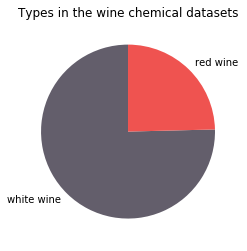

In [4]:
import matplotlib.pyplot as pit


total = len(chemical1.index)
white_wine = chemical1[chemical1['type']=='white']
print("Percentage of white wine: ",(len(white_wine.index)/total)*100,"%")
red_wine = chemical1[chemical1['type']=='red']
print("Percentage of red wine: ",(len(red_wine.index)/total)*100,"%")

pit.pie([len(white_wine.index),len(red_wine.index)], colors = ['#635e6b','#EF5350'], labels = ['white wine','red wine'],startangle=90)
pit.title('Types in the wine chemical datasets')
pit.show()

The number of wines in each quality point of both red and white wine are:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Wines in each quality
+---------+------------+----------+
| Quality | white wine | red wine |
+---------+------------+----------+
|    1    |     0      |    0     |
|    2    |     0      |    0     |
|    3    |     20     |    10    |
|    4    |    163     |    53    |
|    5    |    1457    |   681    |
|    6    |    2198    |   638    |
|    7    |    880     |   199    |
|    8    |    175     |    18    |
|    9    |     5      |    0     |
|    10   |     0      |    0     |
+---------+------------+----------+


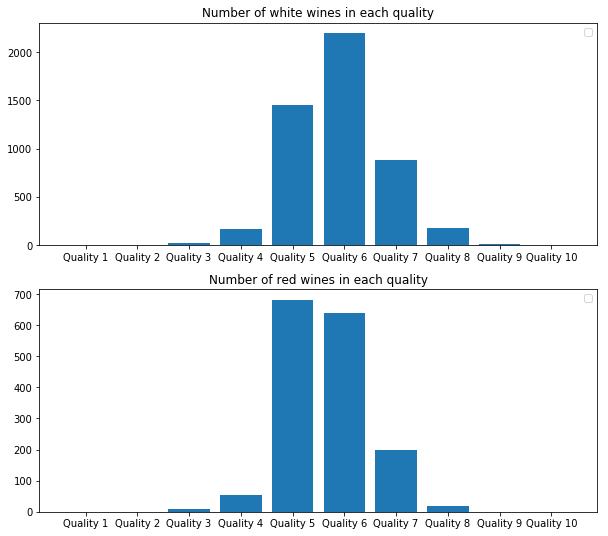

In [33]:
from prettytable import PrettyTable

labels = ['Quality 1','Quality 2','Quality 3','Quality 4','Quality 5','Quality 6','Quality 7','Quality 8','Quality 9','Quality 10']
t = PrettyTable(['Quality', 'white wine', 'red wine'])
values_white = []
values_red = []
for i in range(1,11):
  values_white.append(len(white_wine[white_wine['quality']==i]))
  values_red.append(len(red_wine[red_wine['quality']==i]))
  t.add_row([i,len(white_wine[white_wine['quality']==i]),len(red_wine[red_wine['quality']==i])])

print('Wines in each quality')
print(t)

colors_w = ['#fdf7ff','#f8f2ff','#f1ebfa','#e2ddec','#bfbac8','#a09ba9','#77727f','#635e6b','#433f4b','#221e29']
colors_r = ['#FFEBEE','#FFCDD2','#EF9A9A','#E57373','#EF5350','#F44336','#E53935','#D32F2F','#C62828','#B71C1C']

fig,(ax1,ax2)= pit.subplots(2,1)
fig.set_size_inches(10,9)
#ax1.pie(values_white, colors = colors_w, labels=labels, startangle=90)
ax1.bar(labels, values_white)
ax1.set_title('Number of white wines in each quality')
ax1.legend()

#ax2.pie(values_red, colors = colors_r, labels=labels, startangle=90)
ax2.bar(labels, values_red)
ax2.set_title('Number of white wines in each quality')
ax2.set_title('Number of red wines in each quality')
ax2.legend()

pit.show()


Let's analysis this data by finding the minimum and maximum value of each chemical attribute for every quality points both in the case of red and white wine.

Red Wine Data:
quality:  1
no datasets
quality:  2
no datasets
quality:  3
+----------------------+---------+--------+
|         Name         |   min   |  max   |
+----------------------+---------+--------+
|    fixed acidity     |   6.7   |  11.6  |
|   volatile acidity   |   0.44  |  1.58  |
|     citric acid      |   0.0   |  0.66  |
|    residual sugar    |   1.2   |  5.7   |
|      chlorides       |  0.061  | 0.267  |
| free sulfur dioxide  |   3.0   |  34.0  |
| total sulfur dioxide |   9.0   |  49.0  |
|       density        | 0.99471 | 1.0008 |
|          pH          |   3.16  |  3.63  |
|      sulphates       |   0.4   |  0.86  |
|       alcohol        |   8.4   |  11.0  |
+----------------------+---------+--------+


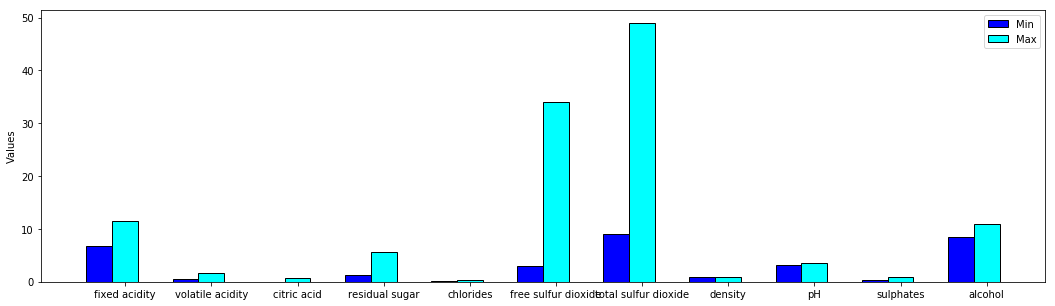

quality:  4
+----------------------+--------+-------+
|         Name         |  min   |  max  |
+----------------------+--------+-------+
|    fixed acidity     |  4.6   |  12.5 |
|   volatile acidity   |  0.23  |  1.13 |
|     citric acid      |  0.0   |  1.0  |
|    residual sugar    |  1.3   |  12.9 |
|      chlorides       | 0.045  |  0.61 |
| free sulfur dioxide  |  3.0   |  41.0 |
| total sulfur dioxide |  7.0   | 119.0 |
|       density        | 0.9934 | 1.001 |
|          pH          |  2.74  |  3.9  |
|      sulphates       |  0.33  |  2.0  |
|       alcohol        |  9.0   |  13.1 |
+----------------------+--------+-------+


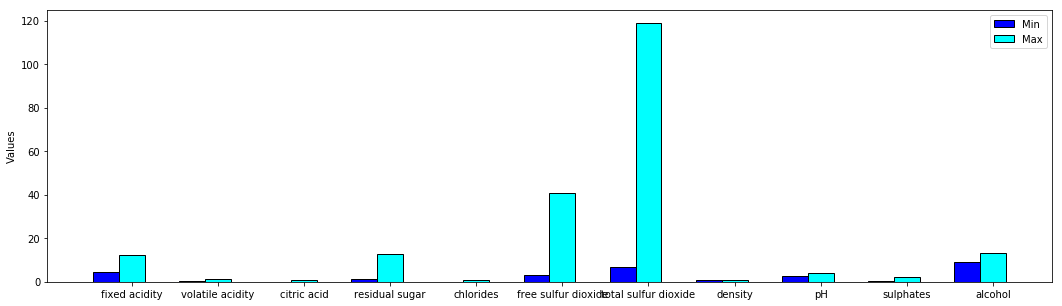

quality:  5
+----------------------+---------+---------+
|         Name         |   min   |   max   |
+----------------------+---------+---------+
|    fixed acidity     |   5.0   |   15.9  |
|   volatile acidity   |   0.18  |   1.33  |
|     citric acid      |   0.0   |   0.79  |
|    residual sugar    |   1.2   |   15.5  |
|      chlorides       |  0.039  |  0.611  |
| free sulfur dioxide  |   3.0   |   68.0  |
| total sulfur dioxide |   6.0   |  155.0  |
|       density        | 0.99256 | 1.00315 |
|          pH          |   2.88  |   3.74  |
|      sulphates       |   0.37  |   1.98  |
|       alcohol        |   8.5   |   14.9  |
+----------------------+---------+---------+


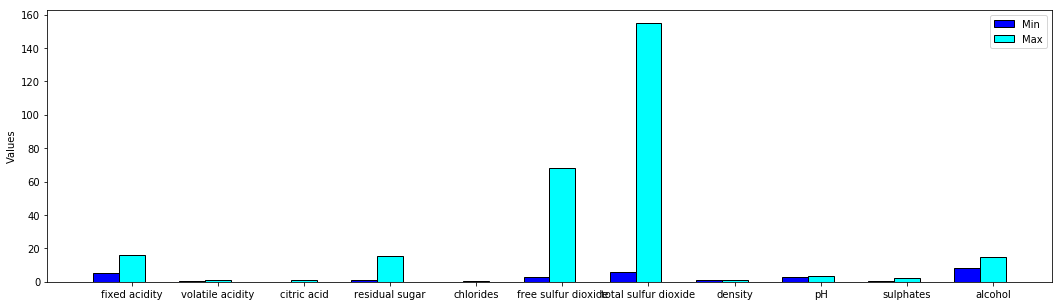

quality:  6
+----------------------+--------------------+---------+
|         Name         |        min         |   max   |
+----------------------+--------------------+---------+
|    fixed acidity     |        4.7         |   14.3  |
|   volatile acidity   |        0.16        |   1.04  |
|     citric acid      |        0.0         |   0.78  |
|    residual sugar    |        0.9         |   15.4  |
|      chlorides       |       0.034        |  0.415  |
| free sulfur dioxide  |        1.0         |   72.0  |
| total sulfur dioxide |        6.0         |  165.0  |
|       density        | 0.9900700000000001 | 1.00369 |
|          pH          |        2.86        |   4.01  |
|      sulphates       |        0.4         |   1.95  |
|       alcohol        |        8.4         |   14.0  |
+----------------------+--------------------+---------+


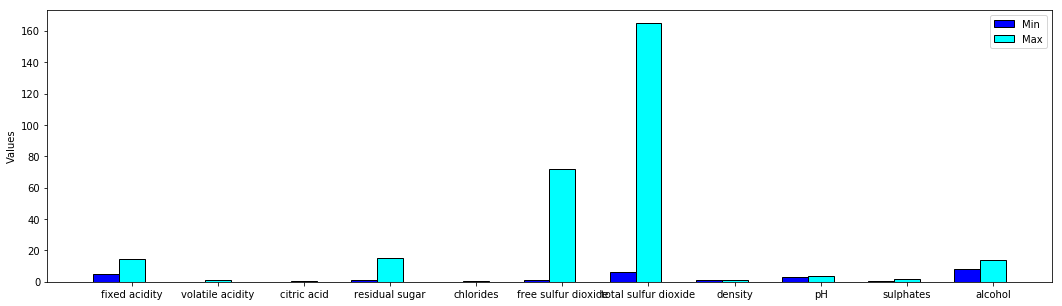

quality:  7
+----------------------+---------+--------+
|         Name         |   min   |  max   |
+----------------------+---------+--------+
|    fixed acidity     |   4.9   |  15.6  |
|   volatile acidity   |   0.12  | 0.915  |
|     citric acid      |   0.0   |  0.76  |
|    residual sugar    |   1.2   |  8.9   |
|      chlorides       |  0.012  | 0.358  |
| free sulfur dioxide  |   3.0   |  54.0  |
| total sulfur dioxide |   7.0   | 289.0  |
|       density        | 0.99064 | 1.0032 |
|          pH          |   2.92  |  3.78  |
|      sulphates       |   0.39  |  1.36  |
|       alcohol        |   9.2   |  14.0  |
+----------------------+---------+--------+


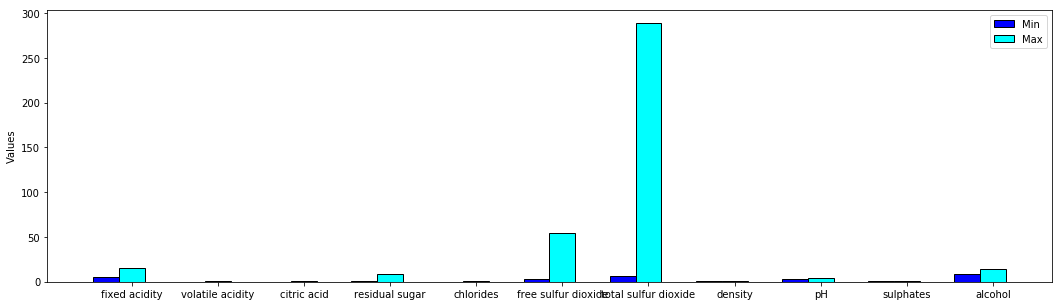

quality:  8
+----------------------+----------------------+--------+
|         Name         |         min          |  max   |
+----------------------+----------------------+--------+
|    fixed acidity     |         5.0          |  12.6  |
|   volatile acidity   |         0.26         |  0.85  |
|     citric acid      |         0.03         |  0.72  |
|    residual sugar    |         1.4          |  6.4   |
|      chlorides       | 0.044000000000000004 | 0.086  |
| free sulfur dioxide  |         3.0          |  42.0  |
| total sulfur dioxide |         12.0         |  88.0  |
|       density        |        0.9908        | 0.9988 |
|          pH          |         2.88         |  3.72  |
|      sulphates       |         0.63         |  1.1   |
|       alcohol        |         9.8          |  14.0  |
+----------------------+----------------------+--------+


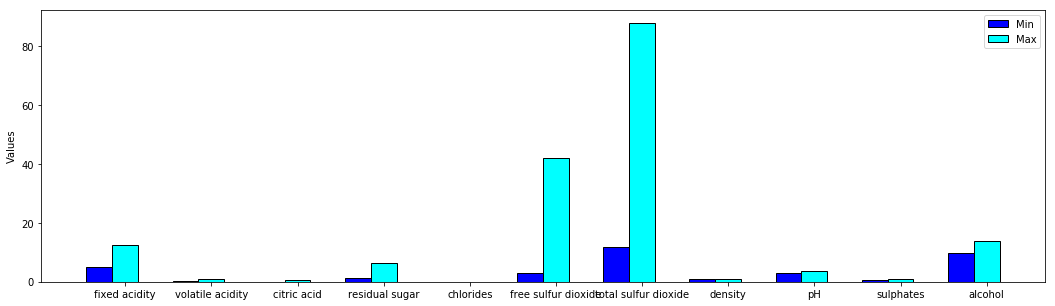

quality:  9
no datasets
quality:  10
no datasets
White Wine Data:
quality:  1
no datasets
quality:  2
no datasets
quality:  3
+----------------------+----------------------+--------+
|         Name         |         min          |  max   |
+----------------------+----------------------+--------+
|    fixed acidity     |         4.2          |  11.8  |
|   volatile acidity   |         0.17         |  0.64  |
|     citric acid      |         0.21         |  0.47  |
|    residual sugar    |         0.7          |  16.2  |
|      chlorides       | 0.022000000000000002 | 0.244  |
| free sulfur dioxide  |         5.0          | 289.0  |
| total sulfur dioxide |         19.0         | 440.0  |
|       density        |        0.9911        | 1.0001 |
|          pH          |         2.87         |  3.55  |
|      sulphates       |         0.28         |  0.74  |
|       alcohol        |         8.0          |  12.6  |
+----------------------+----------------------+--------+


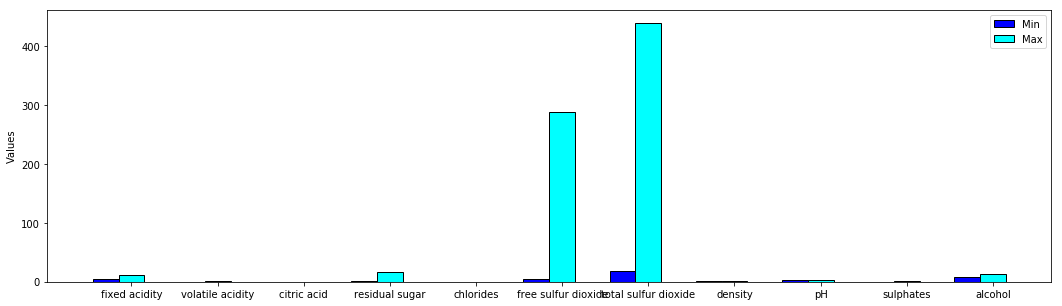

quality:  4
+----------------------+----------------------+--------+
|         Name         |         min          |  max   |
+----------------------+----------------------+--------+
|    fixed acidity     |         4.8          |  10.2  |
|   volatile acidity   |         0.11         |  1.1   |
|     citric acid      |         0.0          |  0.88  |
|    residual sugar    |         0.7          | 17.55  |
|      chlorides       | 0.013000000000000001 |  0.29  |
| free sulfur dioxide  |         3.0          | 138.5  |
| total sulfur dioxide |         10.0         | 272.0  |
|       density        |        0.9892        | 1.0004 |
|          pH          |         2.83         |  3.72  |
|      sulphates       |         0.25         |  0.87  |
|       alcohol        |         8.4          |  13.5  |
+----------------------+----------------------+--------+


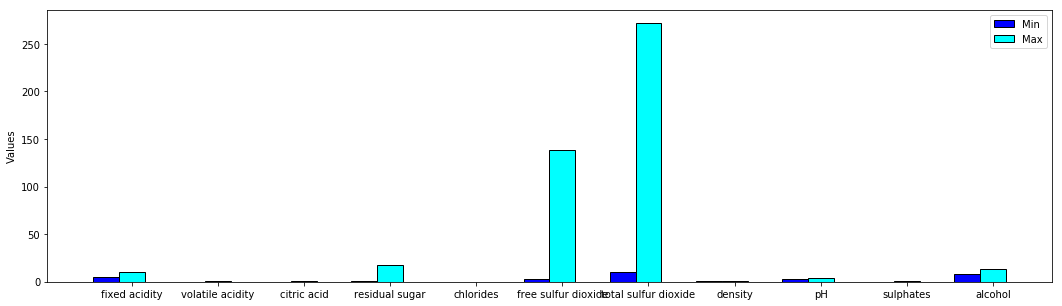

quality:  5
+----------------------+----------------------+---------------------+
|         Name         |         min          |         max         |
+----------------------+----------------------+---------------------+
|    fixed acidity     |         4.5          |         10.3        |
|   volatile acidity   |         0.1          |        0.905        |
|     citric acid      |         0.0          |         1.0         |
|    residual sugar    |         0.6          |         23.5        |
|      chlorides       | 0.009000000000000001 | 0.34600000000000003 |
| free sulfur dioxide  |         2.0          |        131.0        |
| total sulfur dioxide |         9.0          |        344.0        |
|       density        |  0.9872200000000001  |       1.00241       |
|          pH          |         2.79         |         3.79        |
|      sulphates       |         0.27         |         0.88        |
|       alcohol        |         8.0          |         13.6        |
+-------

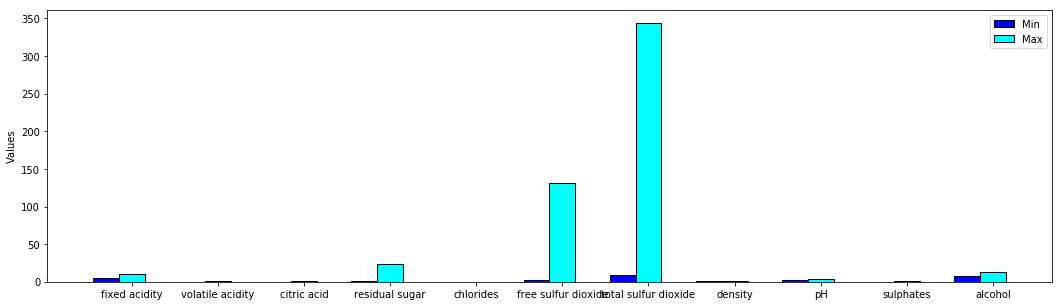

quality:  6
+----------------------+--------------------+---------+
|         Name         |        min         |   max   |
+----------------------+--------------------+---------+
|    fixed acidity     |        3.8         |   14.2  |
|   volatile acidity   |        0.08        |  0.965  |
|     citric acid      |        0.0         |   1.66  |
|    residual sugar    |        0.7         |   65.8  |
|      chlorides       |       0.015        |  0.255  |
| free sulfur dioxide  |        3.0         |  112.0  |
| total sulfur dioxide |        18.0        |  294.0  |
|       density        | 0.9875799999999999 | 1.03898 |
|          pH          |        2.72        |   3.81  |
|      sulphates       |        0.23        |   1.06  |
|       alcohol        |        8.5         |   14.0  |
+----------------------+--------------------+---------+


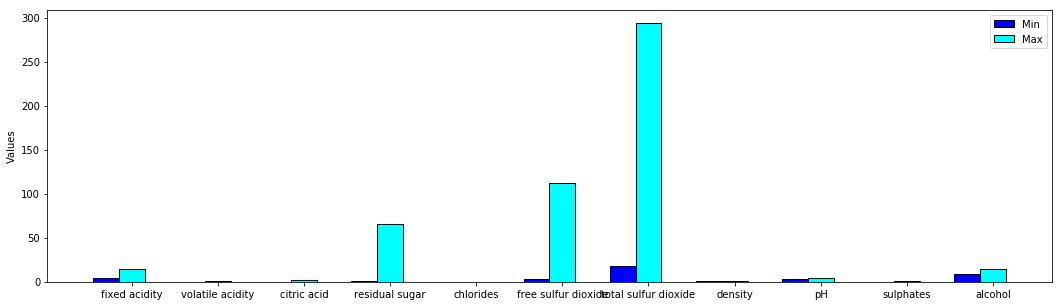

quality:  7
+----------------------+---------+--------+
|         Name         |   min   |  max   |
+----------------------+---------+--------+
|    fixed acidity     |   4.2   |  9.2   |
|   volatile acidity   |   0.08  |  0.76  |
|     citric acid      |   0.01  |  0.74  |
|    residual sugar    |   0.9   | 19.25  |
|      chlorides       |  0.012  | 0.135  |
| free sulfur dioxide  |   5.0   | 108.0  |
| total sulfur dioxide |   34.0  | 229.0  |
|       density        | 0.98711 | 1.0004 |
|          pH          |   2.84  |  3.82  |
|      sulphates       |   0.22  |  1.08  |
|       alcohol        |   8.6   |  14.2  |
+----------------------+---------+--------+


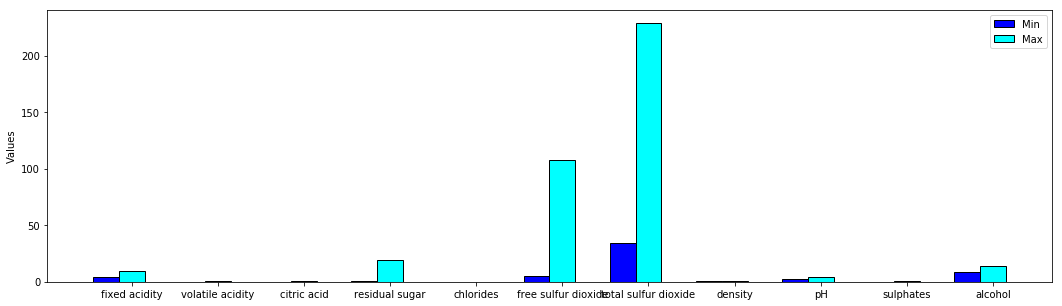

quality:  8
+----------------------+----------------------+--------+
|         Name         |         min          |  max   |
+----------------------+----------------------+--------+
|    fixed acidity     |         3.9          |  8.2   |
|   volatile acidity   |         0.12         |  0.66  |
|     citric acid      |         0.04         |  0.74  |
|    residual sugar    |         0.8          |  14.8  |
|      chlorides       | 0.013999999999999999 | 0.121  |
| free sulfur dioxide  |         6.0          | 105.0  |
| total sulfur dioxide |         59.0         | 212.5  |
|       density        |       0.98713        | 1.0006 |
|          pH          |         2.94         |  3.59  |
|      sulphates       |         0.25         |  0.95  |
|       alcohol        |         8.5          |  14.0  |
+----------------------+----------------------+--------+


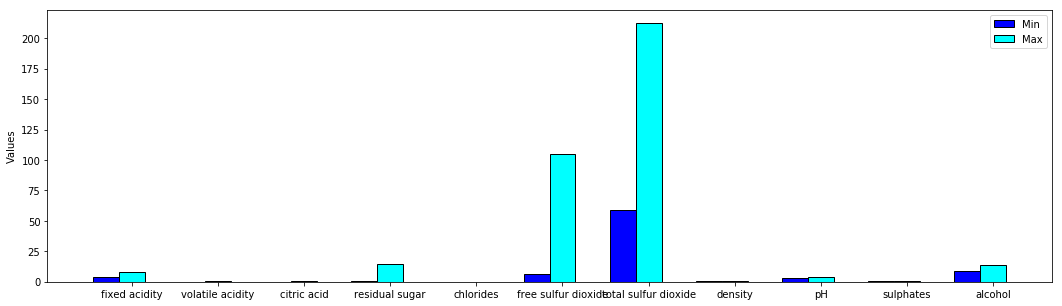

quality:  9
+----------------------+----------------------+-------+
|         Name         |         min          |  max  |
+----------------------+----------------------+-------+
|    fixed acidity     |         6.6          |  9.1  |
|   volatile acidity   |         0.24         |  0.36 |
|     citric acid      |         0.29         |  0.49 |
|    residual sugar    |         1.6          |  10.6 |
|      chlorides       | 0.018000000000000002 | 0.035 |
| free sulfur dioxide  |         24.0         |  57.0 |
| total sulfur dioxide |         85.0         | 139.0 |
|       density        |       0.98965        | 0.997 |
|          pH          |         3.2          |  3.41 |
|      sulphates       |         0.36         |  0.61 |
|       alcohol        |         10.4         |  12.9 |
+----------------------+----------------------+-------+


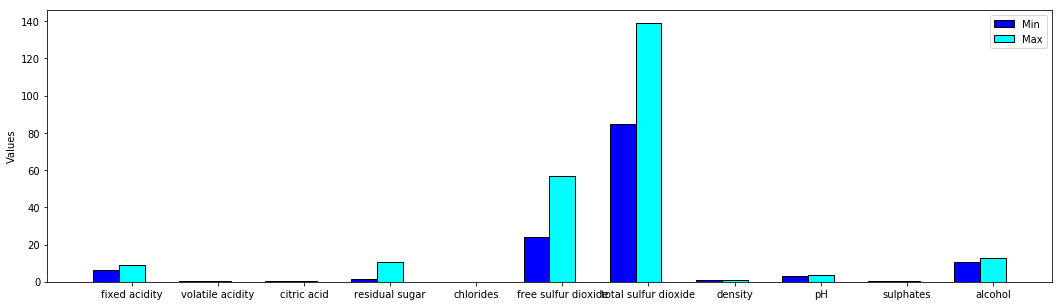

quality:  10
no datasets


In [6]:
import seaborn as sns

feature_names = ['fixed acidity','volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

def find_MIN_MAX(df,q):
  print("quality: ", q)
  if(df.empty):
    print('no datasets')
    return
  else:
    t = PrettyTable(['Name', 'min', 'max'])
    min_list=[]
    max_list=[]
    for x in range(1,12):
      name = df.columns[x]
      mini = df[df.columns[x]].min()
      min_list.append(mini)
      maxi = df[df.columns[x]].max()
      max_list.append(maxi)
      t.add_row([name,mini,maxi])
    print(t)
    barWidth = 0.3
    pit.figure(figsize=(18, 5))
    r1 = np.arange(len(min_list))
    r2 = [x + barWidth for x in r1]
    pit.bar(r1, min_list, width = barWidth, color = 'blue', edgecolor = 'black',label='Min')
    pit.bar(r2, max_list, width = barWidth, color = 'cyan', edgecolor = 'black', label='Max')
    pit.xticks([r + barWidth for r in range(len(min_list))], feature_names)
    pit.ylabel('Values')
    pit.legend()
    pit.show()

    

print('Red Wine Data:')

for i in range(1,11):
   find_MIN_MAX(red_wine[red_wine['quality']==i],i)



print('White Wine Data:')

for i in range(1,11):
  find_MIN_MAX(white_wine[white_wine['quality']==i],i)


Since the quality points mentioned here is in the scale of 0-10, we will change it into scale of 100.

NewValue = (((OldValue - OldMin) * (NewMax - NewMin)) / (OldMax - OldMin)) + NewMin

In [7]:
#for white wine
old_min = white_wine['quality'].min()
old_max = white_wine['quality'].max()

new_min = sensory1['points'].min()
new_max = sensory1['points'].max()
print(new_max)

white_wine['points'] = (((white_wine['quality'] - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
white_wine.head()

100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,points
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,90.0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,90.0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,90.0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,90.0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,90.0


In [8]:
#for red wine
old_min = red_wine['quality'].min()
old_max = red_wine['quality'].max()

red_wine['points'] = (((red_wine['quality'] - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
red_wine.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,points
4898,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,88.0
4899,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,88.0
4900,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,88.0
4901,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,92.0
4902,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,88.0


# Analysis of wine reviews datasets

The wine reviews are seperated into two different csv files. 

In [9]:
uniq_variety1 = sensory1['variety'].unique()
uniq_vriety2 = sensory2['variety'].unique()
common_variety = list(set(uniq_variety1).intersection(uniq_vriety2))
print('Common and unique varieties in both csv are: ',common_variety)
print('Number of varieties :',len(common_variety))

Common and unique varieties in both csv are:  ['Verdelho', 'Aglianico', 'Blaufränkisch', 'Moschofilero', 'Cabernet', 'Mavroudi', 'Antão Vaz', 'Nerello Cappuccio', 'Bastardo', 'Roscetto', 'Negrette', 'Chardonnay-Sauvignon', 'Loureiro', 'Bonarda', 'Malvasia Nera', 'Passerina', 'Carricante', 'Rosato', 'Rotgipfler', 'Alfrocheiro', 'Pinot Bianco', 'Weissburgunder', 'Malbec-Tannat', 'Tinta Barroca', 'Prieto Picudo', 'Merlot', 'Chardonnay-Semillon', 'Marzemino', 'Cabernet Sauvignon-Cabernet Franc', 'Manzoni', 'Albariño', 'Teran', 'Sauvignon Blanc-Chenin Blanc', 'Austrian white blend', 'Favorita', 'Pedro Ximénez', 'Asprinio', 'Aragonez', 'Colombard-Ugni Blanc', 'Encruzado', 'Malvar', 'Garnacha-Syrah', 'Duras', 'Catalanesca', 'Feteasca', 'Aleatico', 'Rieslaner', 'Edelzwicker', 'Zinfandel', 'Kekfrankos', 'Brachetto', 'Mtsvane', 'Tokay Pinot Gris', 'White Riesling', 'Robola', 'Agiorgitiko', 'Nebbiolo', 'Zweigelt', 'Cabernet Sauvignon-Merlot-Shiraz', 'Torrontés', 'Syrah-Cabernet Franc', 'Hondarrab

Since we have many varieties of wine in each of the five categories and we have datasets only for white and red wine, we will consider only the varieties of white and red wines.

In [10]:
white_varieties = ['Aligoté','Alvarinho', 'Auxerrois', 'Bacchus','Bual','Chardonnay','Chasselas','Chenin','Blanc','Colombard','Emerald','Riesling','Fumé','Blanc','Folle','Blanche','Furmint','Gewürztraminer','Grüner Veltliner','Hárslevelü','Jacquère','Kerner','Malvasia','Marsanne','Morio-Muscat','Müller-Thurgau','Muscadelle','Muscadet','Moscato','Palomino','Pedro Ximenez','Picolit','Pinot Blanc','Pinot Gris','Riesling','Rkatsiteli','Sacy','Savagnin','Sauvignon Blanc','Scheurebe','Sémillon','Sercial','Seyval Blan','Silvaner','Trebbiano','Verdelho','Verdicchio','Vidal','Viognier','Viura','Welschriesling']
red_varieties = ['Aglianico','Alicante','Baco','Noir','Barbera','Cabernet Franc','Cabernet Sauvignon','Carignan','Cinsault','de Chaunac','Dolcetto','Freisa','Gamay','Gamay Beaujolais','Grenache','Grignolino','Kadarka','Lambrusco','Malbec','Maréchal Foch','Merlot','Mourvèdre','Nebbiolo','Petite Sirah','Pinot Noir','Pinot','Meunier','Pinotae','primitivo','Ruby Cabernet','Sangiovese','Syrah','Tempranillo,''Touriga Naçional','Xynomavro','Zinfandel']
print('Number of white wine varieties considered: ', len(white_varieties))
print('Number of red wine varieties considered: ', len(red_varieties))

Number of white wine varieties considered:  51
Number of red wine varieties considered:  35


Abstracting only those varieties: ( since some rows have no price and also price is an important attribute, we ignore those rows)

In [11]:
white = pd.concat([sensory1[sensory1['variety'].isin(white_varieties)] ,sensory2[sensory2['variety'].isin(white_varieties)]],sort=False)
white = white[np.isfinite(white['price'])]
print('shape of the white wine: ', white.shape)
white.head()

shape of the white wine:  (58336, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
15,15,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,NaN,NaN,NaN
23,23,US,The apogee of this ambitious winery's white wi...,Giallo Solare,95,60.0,California,Edna Valley,Central Coast,Chardonnay,Center of Effort,NaN,NaN,NaN
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River,NaN,NaN,NaN
31,31,US,"Steely and perfumed, this wine sees only 20% n...",Babushka,90,37.0,California,Russian River Valley,Sonoma,Chardonnay,Zepaltas,NaN,NaN,NaN


In [12]:

red = pd.concat([sensory1[sensory1['variety'].isin(red_varieties)],sensory2[sensory2['variety'].isin(red_varieties)]],sort=False)
red = red[np.isfinite(red['price'])]
print('shape of the red wine: ', red.shape)
red.head()

shape of the red wine:  (97603, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,NaN,NaN,NaN
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,NaN,NaN,NaN
11,11,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,NaN,NaN,NaN


# Predicting the price of the wine based on sensory points

From the wine reviews data, we can create a model for price against points(sensory points). We use Linear Regression to create the model.



white wine::
MEAN SQUARE ERROR:  1048.1499702909866
ROOT MEAN SQUARE ERROR:  32.37514432849662


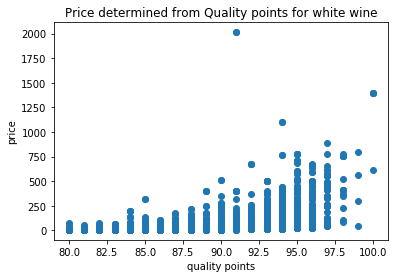

In [13]:
from sklearn.linear_model import LinearRegression,LogisticRegression,  BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = white[['points']]
y = white[['price']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model_price_white = LinearRegression()
model_price_white.fit(x_train,y_train)
y_pred = model_price_white.predict(x_test)
r =metrics.mean_squared_error(y_test,y_pred)
print("white wine::")
print("MEAN SQUARE ERROR: ", r)
print("ROOT MEAN SQUARE ERROR: ",np.sqrt(r))

pit.scatter(x,y)
pit.xlabel('quality points')
pit.ylabel('price')
pit.title('Price determined from Quality points for white wine')
pit.show()


red wine::
MEAN SQUARE ERROR:  993.4139258012065
ROOT MEAN SQUARE ERROR:  31.518469598018342


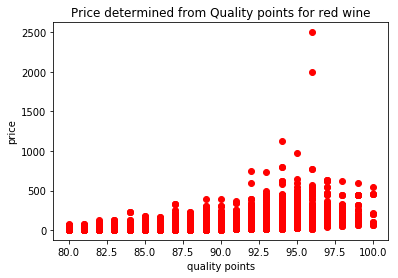

In [14]:
x = red[['points']]
y = red[['price']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model_price_red = LinearRegression()
model_price_red.fit(x_train,y_train)
y_pred = model_price_red.predict(x_test)
r =metrics.mean_squared_error(y_test,y_pred)
print("red wine::")
print("MEAN SQUARE ERROR: ", r)
print("ROOT MEAN SQUARE ERROR: ",np.sqrt(r))

pit.scatter(x,y,color='r')
pit.xlabel('quality points')
pit.ylabel('price')
pit.title('Price determined from Quality points for red wine')
pit.show()

Now finding the unknown price of the wine in the wine quality dataset.

In [15]:
white_wine['price']=model_price_white.predict(np.array(white_wine['points']).reshape(-1,1))
red_wine['price']=model_price_red.predict(np.array(red_wine['points']).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Estimation of quality based on chemical properties

Now we focus on the wine chemical datasets. We train a classification algorithm (Random Forest) with all the chemical properties against the sensory quality. The reason we take the sensory quality as the target is that the wine's taste greatly depends on tose properties. The model for the white wine:

In [16]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

x_white = white_wine[feature_names]
y = white_wine['quality']
x_white.fillna(0, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


We split the dataset into train and test sets.
    train sets: 70%
    test sets: 30%

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_white,y,test_size=0.3)


Training the model:

In [0]:
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Finding the precission recall metrics and ploting the graph which gives the importance of each property.

No handles with labels found to put in legend.


PRECISION RECALL:  0.6292517006802721
alcohol                 0.115915
volatile acidity        0.104861
density                 0.098770
free sulfur dioxide     0.090908
residual sugar          0.089911
chlorides               0.089793
total sulfur dioxide    0.089511
pH                      0.084685
sulphates               0.079482
citric acid             0.079093
fixed acidity           0.077072
dtype: float64


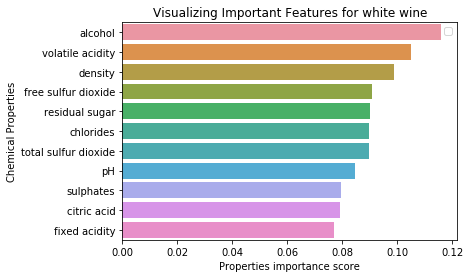

In [19]:
print("PRECISION RECALL: ", metrics.recall_score(y_test,y_pred,average='weighted'))

feature_imp = pd.Series(model.feature_importances_,index = feature_names).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp,y=feature_imp.index)
pit.xlabel('Properties importance score')
pit.ylabel('Chemical Properties')
pit.title('Visualizing Important Features for white wine')
pit.legend()
pit.show()

This is for red wine:

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
No handles with labels found to put in legend.


PRECISION RECALL:  0.65625
alcohol                 0.162543
sulphates               0.127210
total sulfur dioxide    0.109771
volatile acidity        0.102482
density                 0.091044
chlorides               0.075700
fixed acidity           0.069875
free sulfur dioxide     0.066565
citric acid             0.065661
residual sugar          0.065075
pH                      0.064075
dtype: float64


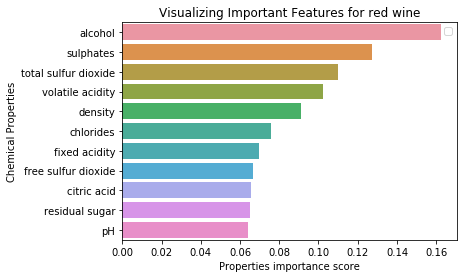

In [20]:
x_red = red_wine[feature_names]
y = red_wine['quality']
x_red.fillna(0, inplace=True)

x_train,x_test,y_train,y_test = train_test_split(x_red,y,test_size=0.3)

model = RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("PRECISION RECALL: ", metrics.recall_score(y_test,y_pred,average='weighted'))

feature_imp = pd.Series(model.feature_importances_,index = feature_names).sort_values(ascending=False)
print(feature_imp)

sns.barplot(x=feature_imp,y=feature_imp.index)
pit.xlabel('Properties importance score')
pit.ylabel('Chemical Properties')
pit.title('Visualizing Important Features for red wine')
pit.legend()
pit.show()

Taking the first five important features from both red wine and white wine random forest models, to create a logistic regression model for predicting the quality.

In [21]:
feature = ['alcohol','density','volatile acidity','free sulfur dioxide','total sulfur dioxide','sulphates']
x = white_wine[feature]
y = white_wine['quality']
x.fillna(0, inplace=True)

model_white = LogisticRegression() #RandomForestClassifier(n_estimators=10)
model_white.fit(x,y)

x = red_wine[feature]
y = red_wine['quality']
x.fillna(0, inplace=True)

model_red = LogisticRegression() #RandomForestClassifier(n_estimators=10)
model_red.fit(x,y)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now lets find the quality based on this model for the wine quality datasets.

In [22]:
white_wine['predicted quality'] = model_white.predict(x_white[feature])
red_wine['predicted quality'] = model_red.predict(x_red[feature])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#Determining the price for the estimated quality

We use the same model(Linear regression) that was trained with points and price for calculating the price again. Before we use the model, first lets convert the quality predicted from the scale of 0-10 to 0-100 scale. This is for white wine:

In [23]:
white_wine['predicted points'] = (((white_wine['predicted quality'] - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
white_wine['predicted price'] = model_price_white.predict(white_wine[['predicted points']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


This is for red wine:

In [24]:
red_wine['predicted points'] = (((red_wine['predicted quality'] - old_min) * (new_max - new_min)) / (old_max - old_min)) + new_min
red_wine['predicted price'] = model_price_red.predict(red_wine[['predicted points']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Comparing the results

Predicted price from sensory points
Total price for white wine:  175313.35
Total price for red wine:  81675.00
Total price :  256988.35
Predicted price from chemical analysis
Total predicted price for white wine:  206469.53
Total predicted price for red wine:  76777.98
Total predicted price :  283247.51


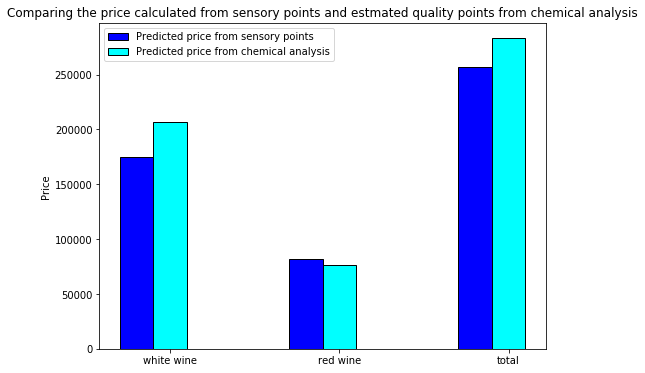

In [25]:
total_price_white = sum(white_wine['price'])
total_price_red = sum(red_wine['price'])
total_price = total_price_white + total_price_red

print('Predicted price from sensory points')
print("Total price for white wine: ", "{0:.2f}".format(total_price_white))
print("Total price for red wine: ", "{0:.2f}".format(total_price_red))
print("Total price : ", "{0:.2f}".format(total_price))


predicted_total_price_white = sum(white_wine['predicted price'])
predicted_total_price_red = sum(red_wine['predicted price'])
predicted_total_price = predicted_total_price_white + predicted_total_price_red

print('Predicted price from chemical analysis')
print("Total predicted price for white wine: ", "{0:.2f}".format(predicted_total_price_white))
print("Total predicted price for red wine: ", "{0:.2f}".format(predicted_total_price_red))
print("Total predicted price : ", "{0:.2f}".format(predicted_total_price))

barWidth = 0.2
pit.figure(figsize=(8, 6))
r1 = np.arange(3)
r2 = [x + barWidth for x in r1]
pit.bar(r1, [total_price_white,total_price_red,total_price], width = barWidth, color = 'blue', edgecolor = 'black',label='Predicted price from sensory points')
pit.bar(r2, [predicted_total_price_white,predicted_total_price_red,predicted_total_price], width = barWidth, color = 'cyan', edgecolor = 'black', label='Predicted price from chemical analysis')
pit.xticks([r + barWidth for r in range(3)], ['white wine','red wine','total'])
pit.ylabel('Price')
pit.title('Comparing the price calculated from sensory points and estmated quality points from chemical analysis')
pit.legend()
pit.show()

From the above, we can say that the wine makers can have a profit for white wine and loss for red wine, but has a total profit.

In [26]:
print('Profit gained for white wine: ',((predicted_total_price_white-total_price_white)/total_price)*100,"%")
print('Loss gained for red wine: ',((total_price_red-predicted_total_price_red)/total_price)*100,"%")
print('Total Profit gained: ',((predicted_total_price-total_price)/total_price)*100,"%")

Profit gained for white wine:  12.123578677644083 %
Loss gained for red wine:  1.9055419682430563 %
Total Profit gained:  10.218036709401028 %


# Conclusion

Sensory points are awarded by tasting the wine. This is not standard and will vary among many tasters. Hence estimating its quality from the sensory points is not accurate.

Our method estimates the quality from the chemical properties, which even the computer can calculate.The price can be changed accourding to the winery, if they can train the computer with their own quality vs price datasets.

# References



1.   [Red and White Wine Analysis](https://https://rstudio-pubs-static.s3.amazonaws.com/98369_7d87780667b74901af21ff93c1c1e1db.html), by Ian Xiao on June 27, 2015
2.  [Correlating Wine Quality Indicators to Chemical and Sensory](https://www.mdpi.com/1420-3049/20/5/8453/pdf
)by Helene Hopfer, Jenny Nelson, Susan E. Ebeler and Hildegarde Heymann on Molecules 2015, 20
3.[ How to Choose a Good Wine](https://www.marketviewliquor.com/blog/2018/08/how-to-choose-a-good-wine/)

**Datasets:**


1.   [Wine chemical dataset](https://www.kaggle.com/rajyellow46/wine-quality) downloaded from kaggle provided by Raj Kumar
2.  [Wine Review](https://www.kaggle.com/zynicide/wine-reviews) downloaded from kaggle provided by zackthout





